# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some useful functions of the Scikit-Learn library

Overview:
    
 0. An end-to-end SciKit-Learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for our problems
 3. Fit the model/algo and use it to make predictions for our data
 4. Evaluating a model
 5. Improve a model
 6. Save and load a trained model
 7. Putting it all together
    
    

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train);

In [6]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model on the training data and test data

clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")

In [ ]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

## 1. Getting data ready to be used with machine learning

Three main things to do:
    1. Split the data into features nad labels (usually 'x' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
x = heart_disease.drop("target", axis=1)
x.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
x.shape[0] * 0.8

In [ ]:
242 + 61

In [ ]:
len(heart_disease)

## 1.1 Make sure it's all numerical

In [ ]:
 car_sales = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended.csv')

In [ ]:
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into x/y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

In [ ]:
x.head()
pd.DataFrame(transformed_x)

In [7]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

NameError: name 'car_sales' is not defined

In [8]:
# Let's refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

model.fit(x_train, y_train)

NameError: name 'transformed_x' is not defined

In [9]:
model.score(x_test,y_test)

NameError: name 'model' is not defined

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [10]:
 # Import car sales missing data
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [11]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
# Create x & y
x= car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

# Let's try to convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [14]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [15]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [16]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [17]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [19]:
len(car_sales_missing)

950

In [20]:
x = car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

In [21]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [22]:
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
# Split into x & y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [26]:
# Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' $ numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
    ])

# Transform the data

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [27]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [28]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [29]:


# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [30]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/algo for your problem

Some things to note:

* Sklearn refers to machine learning models and algorithms as estimators
* Classification problem = predicting a category (heart disease or not)
   * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem = predicting a number (Sales price of car)   

In [31]:
### 2.1 Picking a machine learning model for a regression problem

# Let's use the California Housing dataset

In [32]:
# Get California housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [36]:
# Import algorithm

from sklearn.linear_model import Ridge


# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440126

In [37]:
# What if 'Ridge' didn't work or the score didn't fit our needs?

# Try a different model


In [38]:
# Ensemble model (combination of smaller models to enhance predictions)

In [39]:
# Import the RandomForestRegressor model class from the ensemble model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)

model.score(x_test,y_test)

0.8057655811971304

## 2.2 Picking a machine learning model for a classification problem


In [40]:
heart_disease = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv')

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
len(heart_disease)

303

In [43]:
 # Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [44]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [45]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test,y_test)

0.8524590163934426

In [46]:
# If you have structured data, use ensemble methods
# If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algo on our data and use it to make predictions

### 3.1 Fitting the model to our data

In [47]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [48]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [50]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # This doesn't work!! (example)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test

In [ ]:
clf.predict(x_test)

In [ ]:
y_test

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

## Make predictions with predict_proba()


In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

In [ ]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

In [ ]:
heart_disease["target"].value_counts()

## predict() can also be used for regression models

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# fit the model to the data
model.fit(x_train,y_train)

# make predictions 
y_preds = model.predict(x_test)

In [ ]:
y_preds[:10]

In [ ]:
 np.array(y_test[:10])

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [51]:
housing_df["target"] 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's built-in score() method
    2. The scoring parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
clf.score(x_train,y_train)

1.0

In [54]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [55]:
clf.score(x_test,y_test)

0.8524590163934426

In [56]:
## Using the score() method on our regression problem

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model instance

model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data 
model.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
model.score(x_test,y_test)

0.8057655811971304

In [69]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4.2 Evaluating a model using the 'scoring' parameter

In [70]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
clf.score(x_test,y_test)

0.8524590163934426

In [72]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [74]:
cross_val_score(clf,x,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [76]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [77]:
np.random.seed(42)

In [79]:
# Single training and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross val score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8018032786885245)

In [81]:
# Default scoring parameter of classfier = mean accuracy


# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [85]:
np.mean(cross_val_score)

0.8248087431693989

In [86]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


** Area under the receiver operating characteristic curv (AUC/ROC) **

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [90]:
# Create x_test ...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.83, 0.17],
        [0.55, 0.45],
        [0.91, 0.09],
        [0.03, 0.97],
        [0.13, 0.87],
        [0.05, 0.95],
        [0.39, 0.61],
        [0.82, 0.18],
        [0.01, 0.99],
        [0.53, 0.47]]),
 61)

In [91]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.17, 0.45, 0.09, 0.97, 0.87, 0.95, 0.61, 0.18, 0.99, 0.47])

In [93]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.11538462, 0.11538462, 0.15384615, 0.19230769, 0.19230769,
       0.19230769, 0.23076923, 0.42307692, 0.5       , 0.53846154,
       0.53846154, 0.65384615, 0.65384615, 0.73076923, 0.80769231,
       0.88461538, 0.96153846, 1.        ])

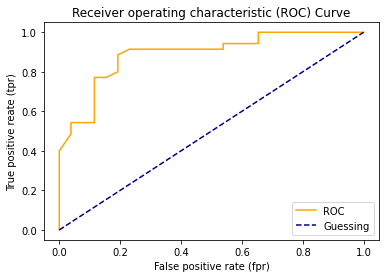

In [94]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr,tpr,color="orange", label = "ROC")
    
    # Plot line with no predictive power
    
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive reate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)    
    

In [95]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8895604395604395

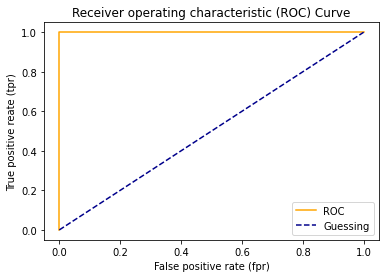

1.0

In [96]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

# Perfect AUC score
roc_auc_score(y_test,y_test)